In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [4]:
!unzip 'drive/MyDrive/Colab Notebooks/archive.zip' -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/seg_train/seg_train/mountain/7506.jpg  
  inflating: data/seg_train/seg_train/mountain/7537.jpg  
  inflating: data/seg_train/seg_train/mountain/7539.jpg  
  inflating: data/seg_train/seg_train/mountain/7551.jpg  
  inflating: data/seg_train/seg_train/mountain/7560.jpg  
  inflating: data/seg_train/seg_train/mountain/7565.jpg  
  inflating: data/seg_train/seg_train/mountain/7578.jpg  
  inflating: data/seg_train/seg_train/mountain/7581.jpg  
  inflating: data/seg_train/seg_train/mountain/7586.jpg  
  inflating: data/seg_train/seg_train/mountain/7647.jpg  
  inflating: data/seg_train/seg_train/mountain/7652.jpg  
  inflating: data/seg_train/seg_train/mountain/7654.jpg  
  inflating: data/seg_train/seg_train/mountain/7662.jpg  
  inflating: data/seg_train/seg_train/mountain/767.jpg  
  inflating: data/seg_train/seg_train/mountain/7672.jpg  
  inflating: data/seg_train/seg_train/mountain/7679.jpg  
  inflating: data/seg_

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [6]:
trainpath = 'data/seg_train/'
predpath = 'data/seg_pred/'
testpath = 'data/seg_test/'

In [7]:
# Reading files [ training_dataset ] 

for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2274 in folder sea
For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2512 in folder mountain
For training data , found 2404 in folder glacier
For training data , found 2382 in folder street


In [8]:
# to change every_folder with label  

code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}


#######################

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [9]:
# to get more info about train_data  ex:[size of each pic , color , num of each size] 
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

In [10]:
# to get more info about test_data  ex:[size of each pic , color , num of each size] 
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()


(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [11]:
# to resize images_train to one equalied size 
s=100     
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [12]:
# to get more info about train_data
# fe 7aga  hena  

print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


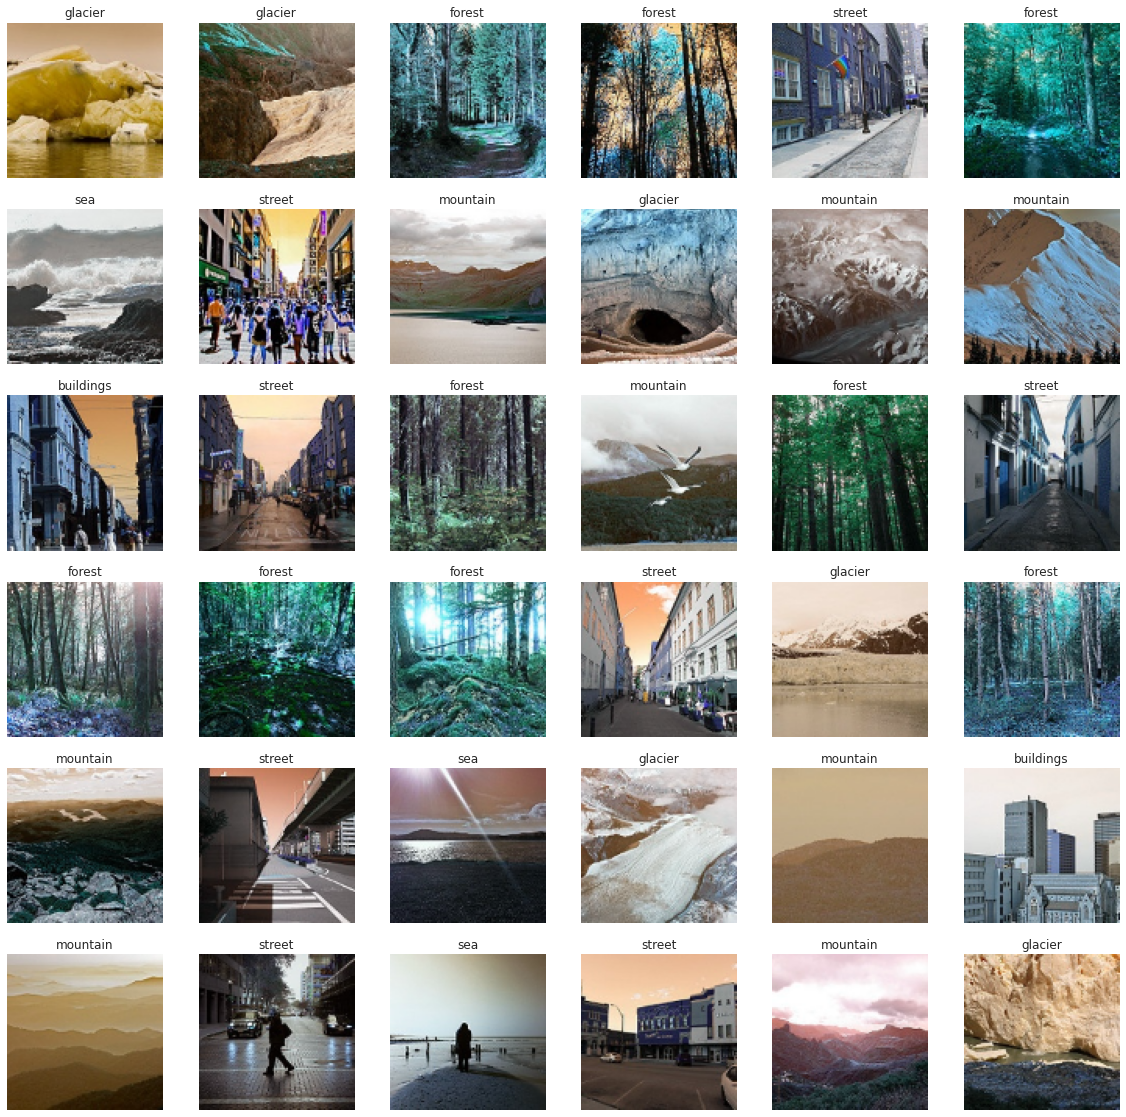

In [13]:
# to get info about pic and show them

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [14]:
# to resize images_test to one equalied size 

X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [15]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


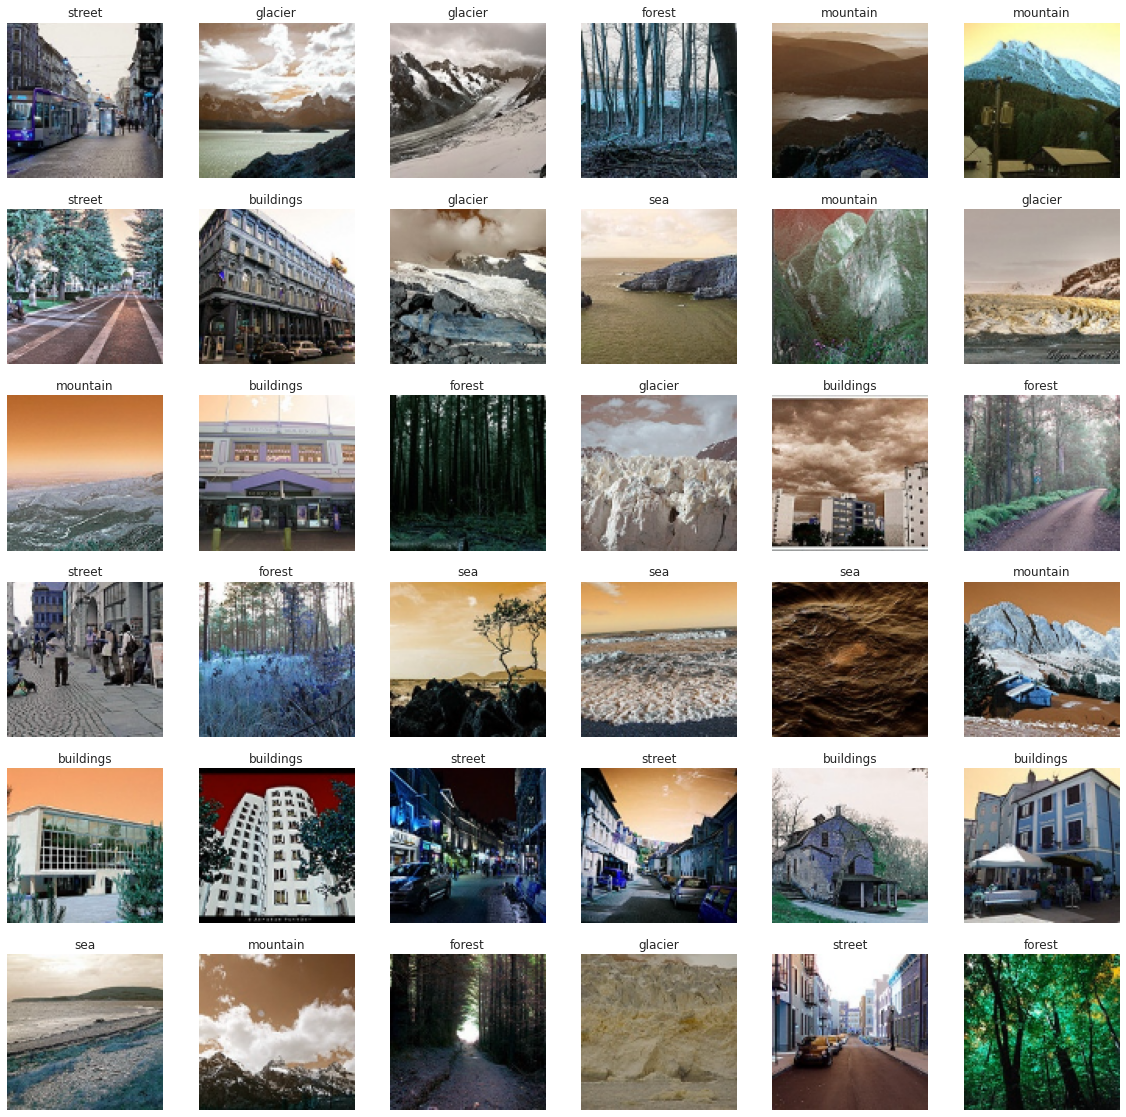

In [19]:
# to get info about pic and show them

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [20]:
# to resize images_prediction to one equalied size
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


In [21]:
################# preprocessing images to arrays ####################
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)


#print(X_train)
#print(f'X_train shape  is {X_train.shape}')
#print(f'X_test shape  is {X_test.shape}')
#print(f'X_pred shape  is {X_pred_array.shape}')
#print(f'y_train shape  is {y_train.shape}')
#print(f'y_test shape  is {y_test.shape}')

In [22]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)) ,
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu') ,
        keras.layers.MaxPool2D(4,4) ,
        keras.layers.Conv2D(120 ,kernel_size=(3,3),activation='relu') ,    
        keras.layers.Conv2D(80 , kernel_size=(3,3),activation='relu') ,    
        keras.layers.Conv2D(50 , kernel_size=(3,3),activation='relu') ,
        keras.layers.MaxPool2D(4 , 4) ,
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [23]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                   

In [25]:
epochs = 60
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=128,verbose=1)
# print('Test Loss is {}'.format(ModelLoss))
# print('Test Accuracy is {}'.format(ModelAccuracy ))

Epoch 1/60
110/110 [==============================] - 130s 1s/step - loss: 0.0892 - accuracy: 0.9718
Epoch 2/60
110/110 [==============================] - 130s 1s/step - loss: 0.0588 - accuracy: 0.9810
Epoch 3/60
110/110 [==============================] - 130s 1s/step - loss: 0.0472 - accuracy: 0.9854
Epoch 4/60
110/110 [==============================] - 130s 1s/step - loss: 0.1311 - accuracy: 0.9603
Epoch 5/60
110/110 [==============================] - 131s 1s/step - loss: 0.0727 - accuracy: 0.9783
Epoch 6/60
110/110 [==============================] - 130s 1s/step - loss: 0.0633 - accuracy: 0.9813
Epoch 7/60
110/110 [==============================] - 130s 1s/step - loss: 0.0540 - accuracy: 0.9835
Epoch 8/60
110/110 [==============================] - 130s 1s/step - loss: 0.0495 - accuracy: 0.9850
Epoch 9/60
110/110 [==============================] - 130s 1s/step - loss: 0.0691 - accuracy: 0.9798
Epoch 10/60
110/110 [==============================] - 130s 1s/step - loss: 0.0831 - accura

In [26]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 10s 78ms/step - loss: 1.9701 - accuracy: 0.8157
Test Loss is 1.9701085090637207
Test Accuracy is 0.815666675567627


In [28]:
KerasModel.save('data/my_model.h5',save_format='h5')

In [29]:
print(KerasModel.evaluate(X_test, y_test))
print(KerasModel.metrics_names)

94/94 [==============================] - 6s 59ms/step - loss: 1.9701 - accuracy: 0.8157
[1.9701085090637207, 0.815666675567627]
['loss', 'accuracy']
